In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [273]:
class rand_move_3d():
    def __init__(self):
        self.position = np.array([0,0,0])
        self.path = self.position.reshape(3,1)
        self.step = 0
        self.back = np.array([])

    def rand_walk(self, steps):
        walk = np.random.choice(np.arange(6), steps, True)
        new_path = np.zeros((3,steps))
        new_path[0][walk==0] += 1
        new_path[0][walk==1] -= 1
        new_path[1][walk==2] += 1
        new_path[1][walk==3] -= 1
        new_path[2][walk==4] += 1
        new_path[2][walk==5] -= 1
        new_path = np.cumsum(new_path, axis=1) + self.position.reshape(3,1)
        
        self.path = np.hstack((self.path, new_path))
        self.position = self.path[:,-1]
        self.step += steps
        new_back = np.zeros(steps)

        if self.back.shape[0] > 0 and self.back[-1] == 1:
            new_back = 1
        else:
            origin = np.array([0,0,0])
            for i in range(self.step):
                if ( self.path[:, i+1] == origin ).all():
                    new_back[i:] = 1
                    break

        self.back = np.hstack((self.back, new_back))


    def plot_path(self, savepath=None):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.plot(self.path[0], self.path[1], self.path[2], 'b.-')
        if savepath:
            fig.savefig(savepath)
        fig.show()


class batch_walk():
    def __init__(self, size):
        self.size = size
        self.persons = [rand_move_3d() for i in range(size)] if size else None

    # # 重新设置batch size
    # def reset_size(self, size):
    #     if self.size is None:
    #         self.persons = [rand_move_3d() for i in range(size)]
    #     elif size < self.size:
    #         self.persons = self.persons[:size]
    #     elif size > self.size:
    #         self.persons += [rand_move_3d() for i in range(size - self.size)]

    def test(self, N):
        '''
        N: the number of steps
        '''
        self.n = N
        self.p = np.zeros(N)
        count = np.zeros(N)
        start_time = time.time()
        for i in range(self.size):
            self.persons[i].rand_walk(N)
            count += self.persons[i].back

        self.p = count/self.size
        end_time = time.time()
        print('run time = {}'.format(end_time - start_time))
        # print('final percentage = {:.3f}'.format(self.p[-1]))
        return self.p[-1]
                
    
    def plot_p(self, savepath=None):
        plt.figure()
        x = np.arange(self.n)
        plt.plot(x, self.p, 'b.-')
        plt.xlabel('steps')
        plt.ylabel('percentage of back to origin')
        plt.title('size = {:}'.format(self.size))
        if savepath:
            plt.savefig(savepath)
        plt.show()

In [274]:
W = rand_move_3d()
W.rand_walk(100)
# W.back

In [279]:
size = 500
n = 10000
B = batch_walk(size)
B.test(n)

final percentage = 0.332


0.332

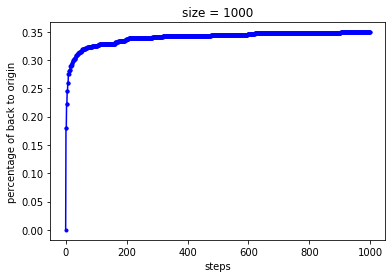

In [271]:
B.plot_p('rand_move_{:}_{:}.jpg'.format(size,n))

In [278]:
a = np.array([0,2,1])
b = np.arange(9).reshape(3,3)
(a==b).all(axis=1)

array([False, False, False])